In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("team-ai/bitcoin-price-prediction")

print("Path to dataset files:", path)

100%|██████████| 37.6k/37.6k [00:00<00:00, 41.5MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/team-ai/bitcoin-price-prediction/versions/2


In [ ]:
!ls '/root/.cache/kagglehub/datasets/team-ai/bitcoin-price-prediction/versions/2'

'bitcoin_price_1week_Test - Test.csv'  'bitcoin_price_Training - Training.csv'


In [ ]:
import os
dataset_dir = '/root/.cache/kagglehub/datasets/team-ai/bitcoin-price-prediction/versions/2'
print("Files in the directory:", os.listdir(dataset_dir))

Files in the directory: ['bitcoin_price_1week_Test - Test.csv', 'bitcoin_price_Training - Training.csv']


In [ ]:
train_path = pd.read_csv("/root/.cache/kagglehub/datasets/team-ai/bitcoin-price-prediction/versions/2/bitcoin_price_Training - Training.csv")
test_path = pd.read_csv("/root/.cache/kagglehub/datasets/team-ai/bitcoin-price-prediction/versions/2/bitcoin_price_1week_Test - Test.csv")

In [ ]:
train_data =(train_path)
test_data =(test_path)

In [ ]:
print("Training Data Shape:", train_data.shape)
print("Testing Data Shape:", test_data.shape)

Training Data Shape: (1556, 7)
Testing Data Shape: (7, 7)


In [ ]:
print("Training Data Info:")
print(train_data.info())
print("Testing Data Info:")
print(test_data.info())

Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1556 non-null   object 
 1   Open        1556 non-null   float64
 2   High        1556 non-null   float64
 3   Low         1556 non-null   float64
 4   Close       1556 non-null   float64
 5   Volume      1556 non-null   object 
 6   Market Cap  1556 non-null   object 
dtypes: float64(4), object(3)
memory usage: 85.2+ KB
None
Testing Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        7 non-null      object 
 1   Open        7 non-null      float64
 2   High        7 non-null      float64
 3   Low         7 non-null      float64
 4   Close       7 non-null      float64
 5   Volume      7 non-null      object 


In [ ]:
print("Missing Values in Training Data:")
print(train_data.isnull().sum())
print("Missing Values in Testing Data:")
print(test_data.isnull().sum())

Missing Values in Training Data:
Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64
Missing Values in Testing Data:
Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64


In [ ]:
print("Training Data First 5 Rows:")
print(train_data.head())
print("Testing Data First 5 Rows:")
print(test_data.head())

Training Data First 5 Rows:
           Date     Open     High      Low    Close         Volume  \
0  Jul 31, 2017  2763.24  2889.62  2720.61  2875.34    860,575,000   
1  Jul 30, 2017  2724.39  2758.53  2644.85  2757.18    705,943,000   
2  Jul 29, 2017  2807.02  2808.76  2692.80  2726.45    803,746,000   
3  Jul 28, 2017  2679.73  2897.45  2679.73  2809.01  1,380,100,000   
4  Jul 27, 2017  2538.71  2693.32  2529.34  2671.78    789,104,000   

       Market Cap  
0  45,535,800,000  
1  44,890,700,000  
2  46,246,700,000  
3  44,144,400,000  
4  41,816,500,000  
Testing Data First 5 Rows:
           Date     Open     High      Low    Close         Volume  \
0  Aug 07, 2017  3212.78  3397.68  3180.89  3378.94  1,482,280,000   
1  Aug 06, 2017  3257.61  3293.29  3155.60  3213.94  1,105,030,000   
2  Aug 05, 2017  2897.63  3290.01  2874.83  3252.91  1,945,700,000   
3  Aug 04, 2017  2806.93  2899.33  2743.72  2895.89  1,002,120,000   
4  Aug 03, 2017  2709.56  2813.31  2685.14  2804.73   

In [ ]:
print(train_data.describe())

              Open         High          Low        Close
count  1556.000000  1556.000000  1556.000000  1556.000000
mean    582.625328   597.992847   567.851446   584.239396
std     523.137312   542.992855   505.877401   525.904442
min      68.500000    74.560000    65.530000    68.430000
25%     254.287500   260.327500   248.835000   254.320000
50%     438.600000   447.560000   430.570000   438.855000
75%     662.437500   674.525000   646.735000   663.402500
max    2953.220000  2999.910000  2840.530000  2958.110000


In [ ]:
def preprocess_data(data):
    data['Date'] = pd.to_datetime(data['Date'])
    data.sort_values('Date', inplace=True)
    data['Volume'] = data['Volume'].astype(str).replace('-', '0').str.replace(',', '', regex=True).astype(float)
    data['Market Cap'] = data['Market Cap'].astype(str).replace('-', '0').str.replace(',', '', regex=True).astype(float)
    return data


In [ ]:
train_data = preprocess_data(train_data)
test_data = preprocess_data(test_data)

In [ ]:
print(train_data.describe())

                      Date         Open         High          Low  \
count                 1556  1556.000000  1556.000000  1556.000000   
mean   2015-06-14 12:00:00   582.625328   597.992847   567.851446   
min    2013-04-28 00:00:00    68.500000    74.560000    65.530000   
25%    2014-05-21 18:00:00   254.287500   260.327500   248.835000   
50%    2015-06-14 12:00:00   438.600000   447.560000   430.570000   
75%    2016-07-07 06:00:00   662.437500   674.525000   646.735000   
max    2017-07-31 00:00:00  2953.220000  2999.910000  2840.530000   
std                    NaN   523.137312   542.992855   505.877401   

             Close        Volume    Market Cap  
count  1556.000000  1.556000e+03  1.556000e+03  
mean    584.239396  1.250255e+08  8.694353e+09  
min      68.430000  0.000000e+00  7.792550e+08  
25%     254.320000  1.458615e+07  3.598355e+09  
50%     438.855000  3.275035e+07  6.386210e+09  
75%     663.402500  7.767028e+07  9.898830e+09  
max    2958.110000  2.569530e+09  4

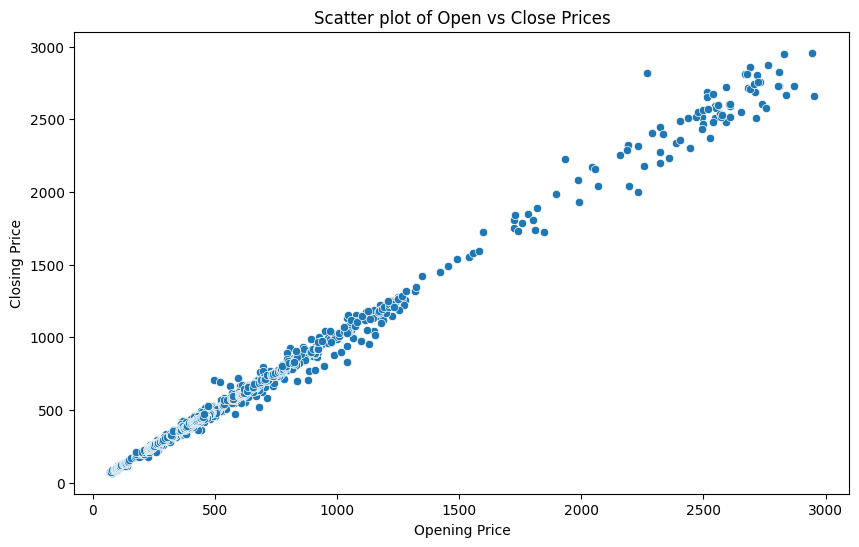

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=train_data['Open'], y=train_data['Close'])
plt.xlabel("Opening Price")
plt.ylabel("Closing Price")
plt.title("Scatter plot of Open vs Close Prices")
plt.show()

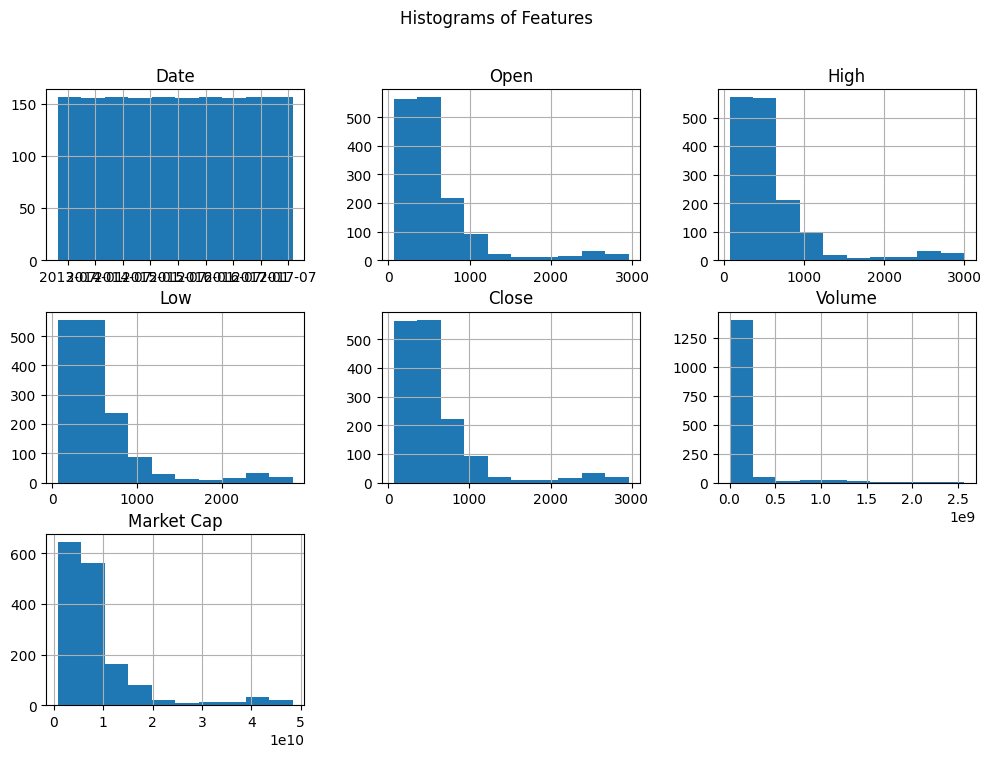

In [ ]:
train_data.hist(figsize=(12, 8))
plt.suptitle("Histograms of Features")
plt.show()

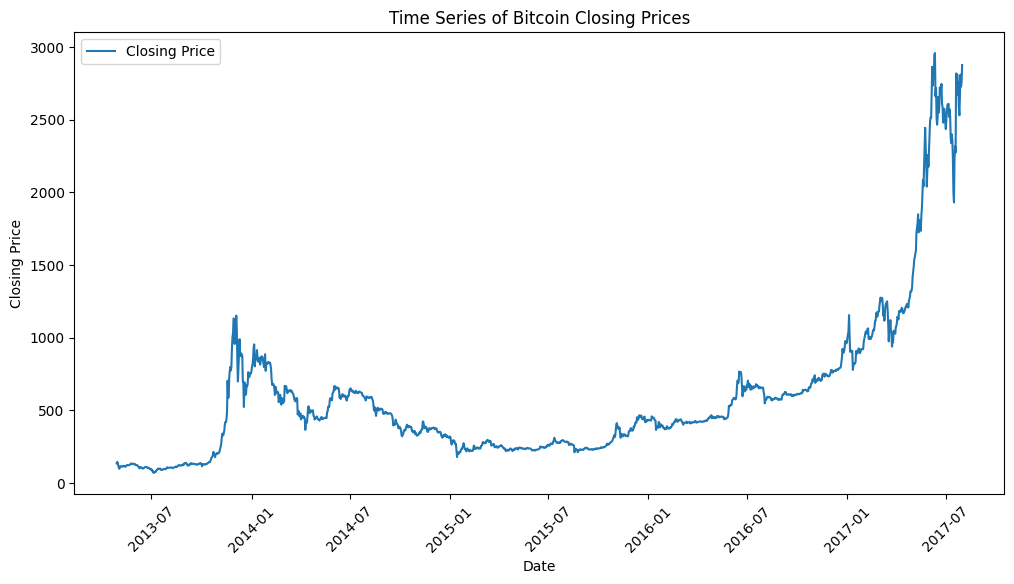

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(train_data['Date'], train_data['Close'], label='Closing Price')
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Time Series of Bitcoin Closing Prices")
plt.legend()
plt.xticks(rotation=45)
plt.show()

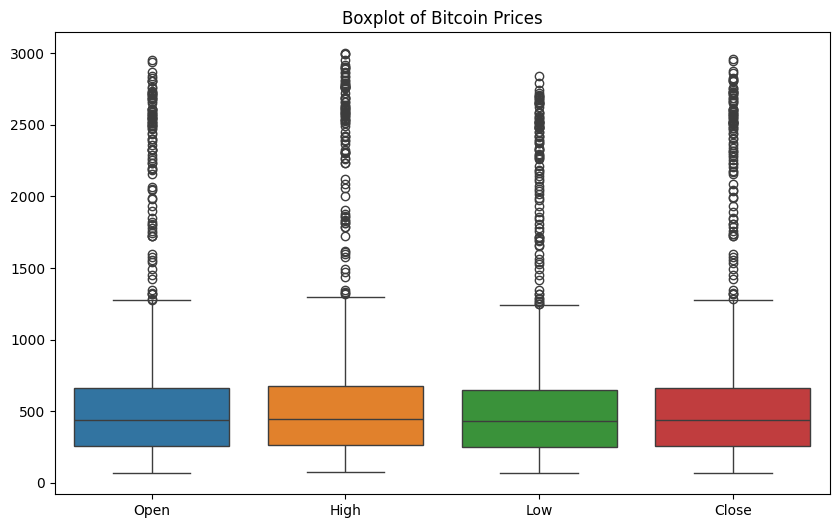

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_data[['Open', 'High', 'Low', 'Close']])
plt.title("Boxplot of Bitcoin Prices")
plt.show()

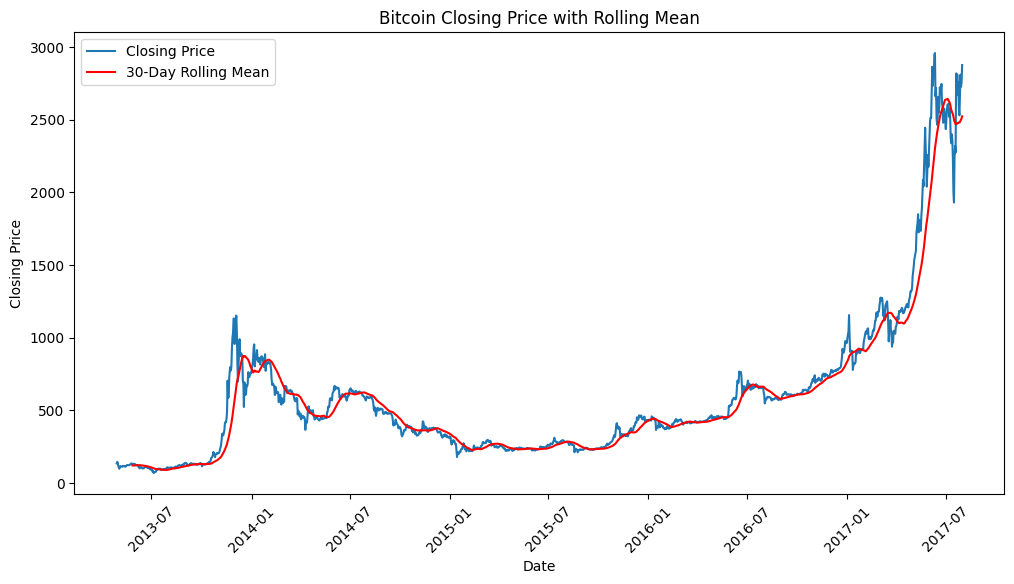

<Figure size 1200x800 with 0 Axes>

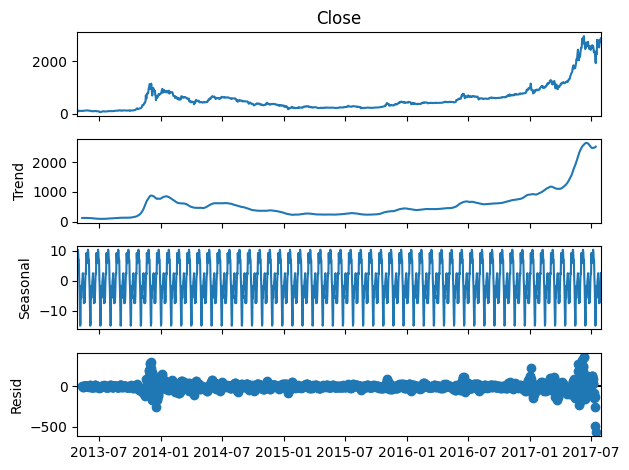

<Figure size 1200x600 with 0 Axes>

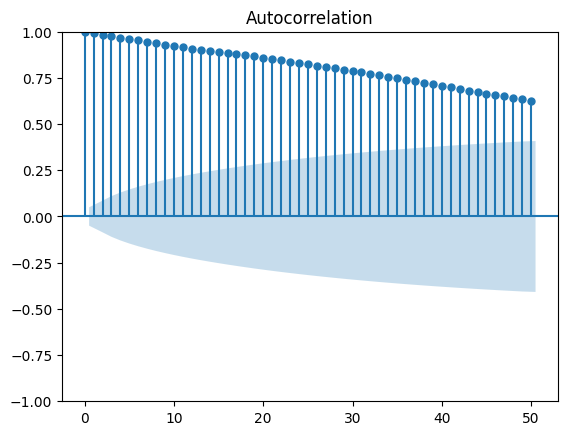

<Figure size 1200x600 with 0 Axes>

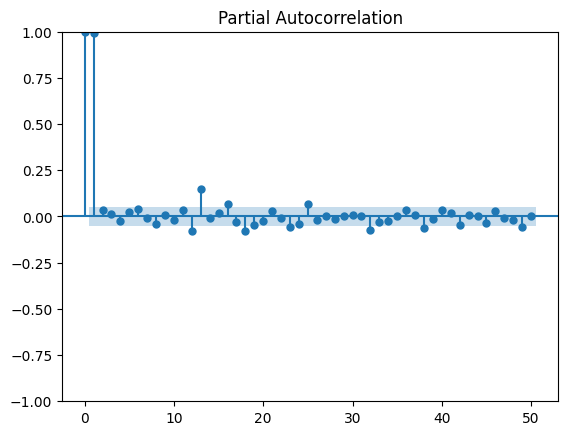

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

train_data = train_data.set_index('Date')

rolling_mean = train_data['Close'].rolling(window=30).mean()
plt.figure(figsize=(12, 6))
plt.plot(train_data['Close'], label='Closing Price')
plt.plot(rolling_mean, label='30-Day Rolling Mean', color='red')
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Bitcoin Closing Price with Rolling Mean")
plt.legend()
plt.xticks(rotation=45)
plt.show()


from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(train_data['Close'], model='additive', period=30) # Assuming a 30-day period

plt.figure(figsize=(12,8))
decomposition.plot()
plt.show()


from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12,6))
plot_acf(train_data['Close'], lags=50)
plt.show()

plt.figure(figsize=(12,6))
plot_pacf(train_data['Close'], lags=50)
plt.show()


In [ ]:
X = train_data[['Open', 'High', 'Low', 'Volume']]
y = train_data['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "SVM": SVR(kernel='rbf'),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f"{name} Model Performance:")
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("R2 Score:", r2_score(y_test, y_pred))
    print("-" * 50)

Linear Regression Model Performance:
MSE: 295.07536059760866
R2 Score: 0.9990739812049602
--------------------------------------------------
SVM Model Performance:
MSE: 251698.32335201747
R2 Score: 0.2101089781540948
--------------------------------------------------
Random Forest Model Performance:
MSE: 457.79308269746423
R2 Score: 0.9985633331161282
--------------------------------------------------


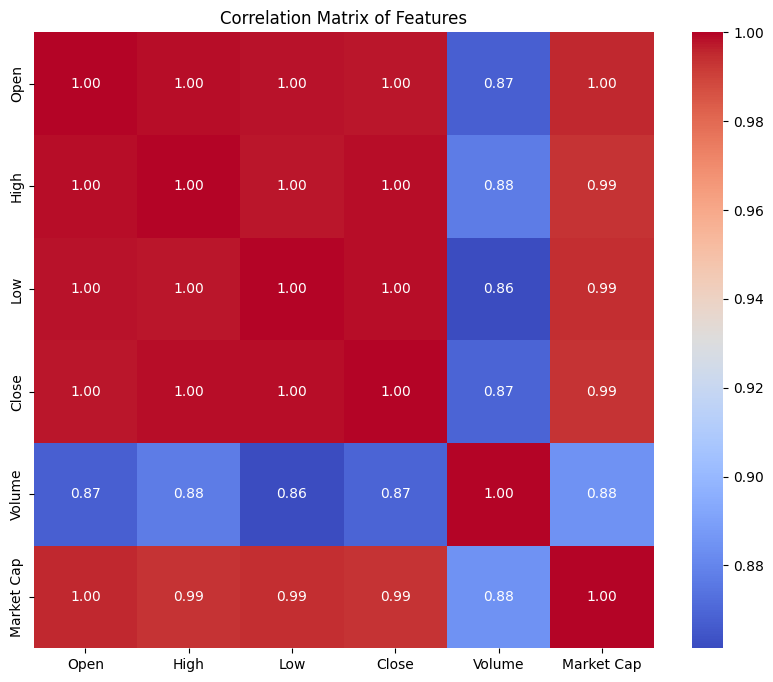

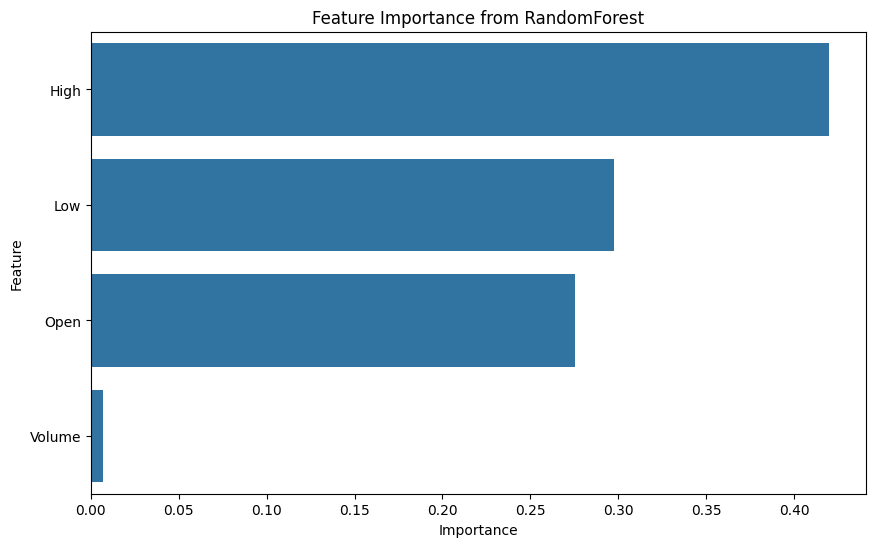

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt

correlation_matrix = train_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)
importances = model.feature_importances_
feature_names = X.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from RandomForest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [ ]:
Q1 = train_data.quantile(0.25)
Q3 = train_data.quantile(0.75)
IQR = Q3 - Q1
outlier_mask = ((train_data < (Q1 - 1.5 * IQR)) | (train_data > (Q3 + 1.5 * IQR))).any(axis=1)
train_data_no_outliers = train_data[~outlier_mask]

In [ ]:
X_no_outliers = train_data_no_outliers[['Open', 'High', 'Low', 'Volume']]
y_no_outliers = train_data_no_outliers['Close']
X_train, X_test, y_train, y_test = train_test_split(X_no_outliers, y_no_outliers, test_size=0.2, random_state=42)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f"{name} Model Performance after Outlier Removal:")
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("R2 Score:", r2_score(y_test, y_pred))
    print("-" * 50)

Linear Regression Model Performance after Outlier Removal:
MSE: 94.37224776028043
R2 Score: 0.9983848102959854
--------------------------------------------------
SVM Model Performance after Outlier Removal:
MSE: 21956.778518548028
R2 Score: 0.62420771531718
--------------------------------------------------
Random Forest Model Performance after Outlier Removal:
MSE: 145.15616806136117
R2 Score: 0.9975156388271849
--------------------------------------------------


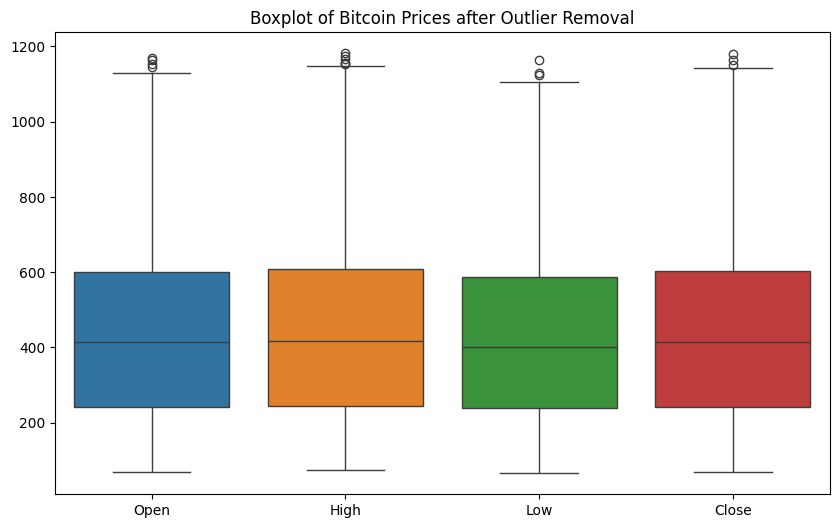

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_data_no_outliers[['Open', 'High', 'Low', 'Close']])
plt.title("Boxplot of Bitcoin Prices after Outlier Removal")
plt.show()

In [ ]:
numeric_columns = train_data_no_outliers.select_dtypes(include=['number'])
print("Skewness:")
print(numeric_columns.skew())

print("Kurtosis:")
print(numeric_columns.kurtosis())

Skewness:
Open          0.593615
High          0.616322
Low           0.570071
Close         0.603122
Volume        1.205204
Market Cap    0.734182
dtype: float64
Kurtosis:
Open         -0.179518
High         -0.138824
Low          -0.227572
Close        -0.158412
Volume        1.015669
Market Cap    0.368028
dtype: float64


Model Comparison Results:
               Model  R2 Score
0  Linear Regression  0.998385
1                SVM  0.624208
2      Random Forest  0.997516

Best Model: Linear Regression (R2 Score: 0.9984)


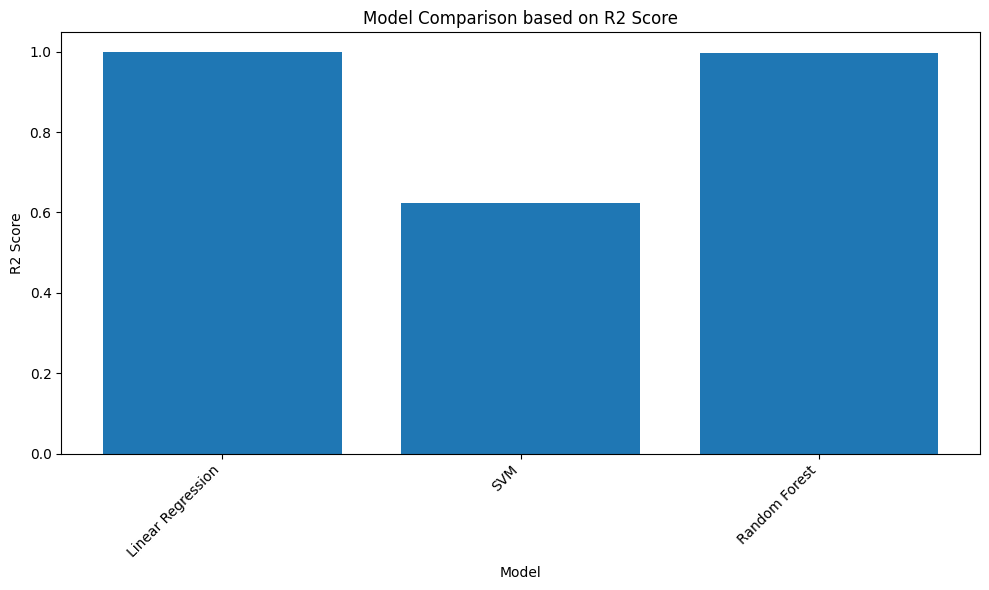

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt


results = []
for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    r2 = r2_score(y_test, y_pred)
    results.append((name, r2))

results_df = pd.DataFrame(results, columns=['Model', 'R2 Score'])
best_model = results_df.loc[results_df['R2 Score'].idxmax()]

print("Model Comparison Results:")
print(results_df)
print(f"\nBest Model: {best_model['Model']} (R2 Score: {best_model['R2 Score']:.4f})")

plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['R2 Score'])
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.title('Model Comparison based on R2 Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


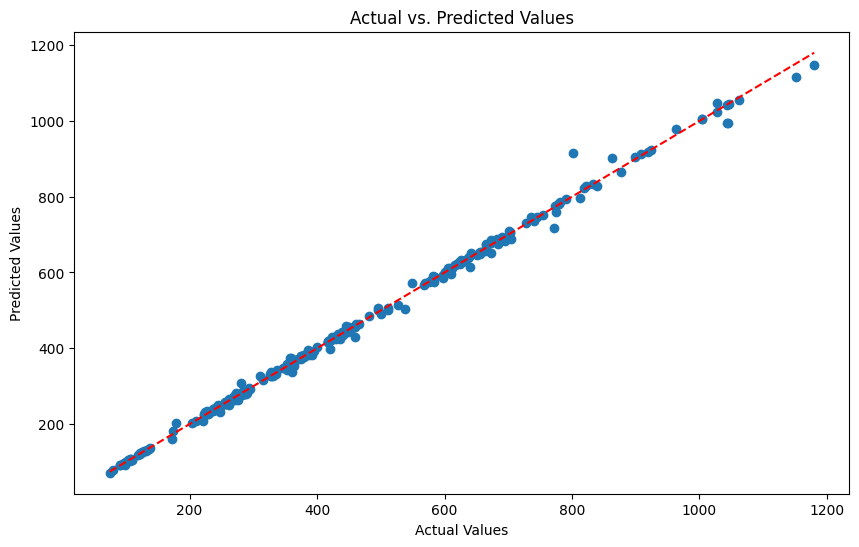

In [ ]:

import matplotlib.pyplot as plt



plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()


In [ ]:
from scipy.stats import shapiro

stat, p = shapiro(train_data_no_outliers['Close'])

print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05

if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')


Statistics=0.957, p=0.000
Sample does not look Gaussian (reject H0)


In [ ]:

f_statistic, p_value = stats.f_oneway(y_test, y_pred)

print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis: There is a statistically significant difference in variances between actual and predicted values.")
else:
    print("Fail to reject the null hypothesis: There is no statistically significant difference in variances between actual and predicted values.")


F-statistic: 0.0009757761767271484
P-value: 0.9750916997631773
Fail to reject the null hypothesis: There is no statistically significant difference in variances between actual and predicted values.


In [ ]:

from scipy import stats

groups = {}
groups['Open'] = train_data_no_outliers['Open']
groups['Close'] = train_data_no_outliers['Close']

fvalue, pvalue = stats.f_oneway(groups['Open'], groups['Close'])

print(f"F-statistic: {fvalue}")
print(f"P-value: {pvalue}")

alpha = 0.05

if pvalue < alpha:
    print("Reject null hypothesis: There is a statistically significant difference in means among the groups.")
else:
    print("Fail to reject null hypothesis: There is no statistically significant difference in means among the groups.")


F-statistic: 0.007543025955728522
P-value: 0.9307966675384967
Fail to reject null hypothesis: There is no statistically significant difference in means among the groups.
